In [1]:
import requests
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup

In [2]:
def gasoline_price():
    """Gets current gasoline price in Swedish Krona"""
    try:
        page = requests.get('https://www.globalpetrolprices.com/Sweden/gasoline_prices/')
        soup = BeautifulSoup(page.content, 'html.parser')
        body = soup.body
        table = body.find('div', {'id': 'contentHolder'}).table
        entries = table.tbody.find_all('tr')
        # Scraped cost in liters
        cost_liters = [float(entry.find_all('td')[0].text) for entry in entries]

        return cost_liters[0]
    except:
        return None

In [3]:
def electricity_price():
    """Gets current electricity price in Swedish Krona"""
    try:
        page = requests.get('https://www.vattenfall.se/elavtal/elmarknaden/elmarknaden-just-nu/')
        soup = BeautifulSoup(page.content, 'html.parser')
        body = soup.body
        tbody = body.find('table').tbody
        entries = tbody.find_all('tr')
        data = entries[1:]
        # Scraped Values
        prices_2022 = [datum.find_all('td')[1].text for datum in data]
        prices_as_float = [float(price.split()[0].replace(',', '.')) for price in prices_2022]
        max_price_sek = max(prices_as_float) / 100

        return max_price_sek
    except:
        return None

In [4]:
def gasoline_cost_sek(dist, sekpl=20.0, kmpl=9.4):
    """Gets cost of commute via car in Swedish Krona.
    Inputs:
        dist: distance in kilometers (numeric)
        sekpl: Swedish Krona (SEK) per liter (L). Obtained from gasoline_price() function.
        kmpl: Kilometers (km) per liter (L). (Fuel efficiency)
        
    kmpl estimation from: 
        https://www.bts.gov/content/average-fuel-efficiency-us-passenger-cars-and-light-trucks
    """
    return sekpl * dist / kmpl

In [5]:
def electricity_cost_sek(dist, sekpkwh=.85, kmpkwh=100):
    """Gets cost of commute via ebike in Swedish Krona.
    Inputs:
        dist: distance in kilometers (numeric)
        sekpkwh: Swedish Krona (SEK) per kilowatt-hour (kWh). Obtained from electricity_price() function.
        kmpkwh: Kilometers (km) per kilowatt-hour (kWh).
        
    ebikes: 80-100 kilometers per kWh?
        https://www.ebikejourney.com/ebike/
    """
    return sekpkwh * dist / kmpkwh

In [40]:
def circle_plot(dist, gas_price, elec_price, kmpl=9.4, kmpkwh=100):
    """Generates a plot where the area of each circle is proportional to the cost of the commute."""
    gas_cost = gasoline_cost_sek(dist, gas_price, kmpl)
    elec_cost = electricity_cost_sek(dist, elec_price, kmpkwh)

    radius_g = gas_cost**.5
    radius_e = elec_cost**.5
    circle_g = plt.Circle((radius_g, radius_g), radius_g, color='r', label='gasoline cost', alpha=0.8)
    circle_e = plt.Circle((0.7*radius_g, 0.7*radius_g), radius_e, color='g', label='electricity cost', alpha=0.8)

    fig, ax = plt.subplots()
    ax.set_xlim([0, 2.02*radius_g])
    ax.set_ylim([0, 2.05*radius_g])
    ax.add_patch(circle_g)
    ax.add_patch(circle_e)
    ax.axis('off')
    ax.legend()
    plt.savefig('circleplot.png', transparent=True)

In [7]:
elec_price = electricity_price() or 0.85
gas_price = gasoline_price() or 20.0

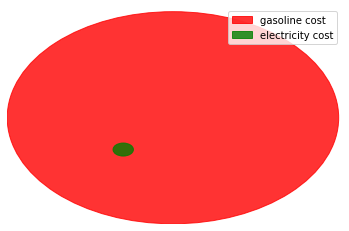

In [41]:
circle_plot(50, gas_price, elec_price)